# Photon Survival Probability: \( P_{\gamma\gamma} = 1 - P_{a\gamma} \)

We compute the photon survival probability due to photon-ALP mixing in a magnetic field, assuming natural units (\( \hbar = c = 1 \)).

---

## Formula

The conversion probability \( P_{a\gamma} \) is:

$
P_{a\gamma} = \frac{1}{4} \left( \frac{2g_{a\gamma} B_T E}{\Delta_{\text{osc}}^2} \right)^2 \sin^2\left( \frac{\Delta_{\text{osc}} s}{2} \right)
$

Where:
- $ B_T = B \sin\theta $ is the transverse magnetic field
- $ \Delta_{\text{osc}}^2 = \left( \frac{m_a^2}{2E} \right)^2 + (g_{a\gamma} B_T)^2 $

---

## Parameters

- Magnetic field: $ B = 10^{-9} \, \text{G} $
- Domain size: $s = 1 \, \text{Mpc} $
- ALP mass: $ m_a = 1 \, \text{neV} $
- Coupling: $ g_{a\gamma} = 10^{-11} \, \text{GeV}^{-1} $
- Photon energy range: $ 100 \, \text{GeV} \to 100 \, \text{TeV} $
- Mixing angles:  $ \theta = 15^\circ, 45^\circ, 75^\circ $

---


   

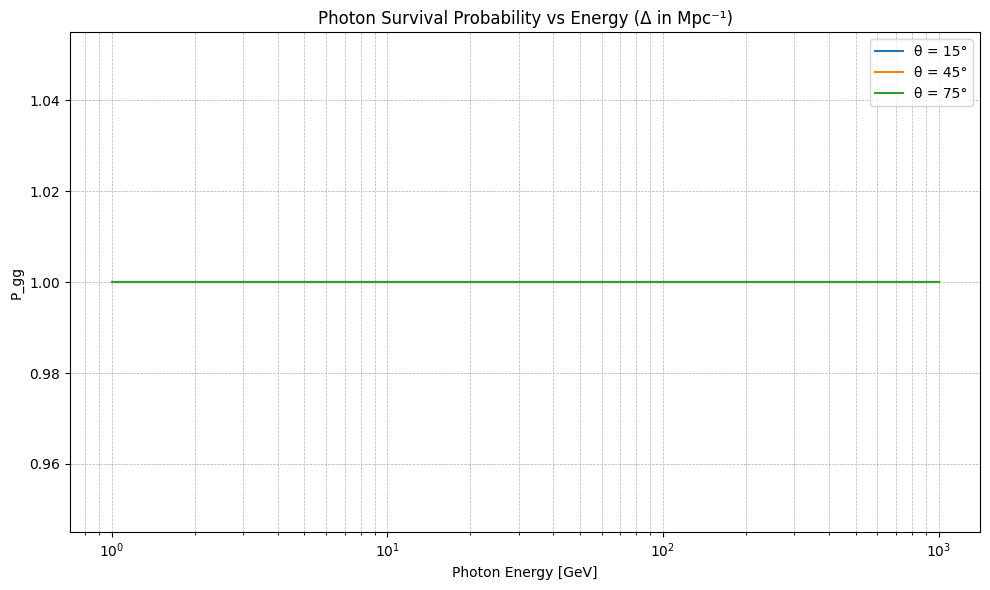

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import giga, tera, electron_volt

# Unit conversion: 1 eV = 1.5637e-29 Mpc^-1
eV_to_Mpc_inv = 1.5637e-29

# Parameters
B_G = 1e-9                    # B in Gauss
G_to_GeV2 = 1.95e-2           # 1 G = 1.95e-2 GeV^2
B = B_G * G_to_GeV2           # Convert to GeV^2
s = 1                         # s in Mpc (keep in Mpc)
m_a = 1e-9                    # m_a in eV
g_ag = 1e-11 / 1e9            # g_ag in eV^-1

# Energy array from 100 GeV to 100 TeV
E_vals_eV = np.logspace(np.log10(100e9), np.log10(100e12), 500)  # in eV

# Angles in degrees and radians
thetas_deg = [15, 45, 75]
thetas_rad = [np.radians(t) for t in thetas_deg]

plt.figure(figsize=(10, 6))

for theta in thetas_rad:
    B_T = B * np.sin(theta)                          # in GeV^2
    delta_ag = 1/2* g_ag * B_T                            # in eV
    delta_a = m_a**2 / (2 * E_vals_eV)               # in eV

    # Convert Δs to Mpc^-1
    delta_ag_mpc = delta_ag * eV_to_Mpc_inv
    delta_a_mpc = delta_a * eV_to_Mpc_inv
    delta_osc = np.sqrt(delta_a_mpc**2 + delta_ag_mpc**2)

    sin_2theta = np.sin(2 * np.arctan2(2 * delta_ag_mpc, delta_a_mpc))
    P_ag = sin_2theta**2 * np.sin(0.5 * delta_osc * s)**2
    P_gg = 1 - P_ag

    plt.plot(E_vals_eV / 1e9, P_gg, label=f'θ = {np.degrees(theta):.0f}°')

# Plotting
plt.xscale('log')
plt.xlabel('Photon Energy [GeV]')
plt.ylabel('P_gg')
plt.title('Photon Survival Probability vs Energy (Δ in Mpc⁻¹)')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()
